In [1]:
import pandas as pd
from utils.constants import Constants

C = Constants()

def display_input_data(batch_id: int, data_id: int, order_type: str):

    id_path = C.ID_array_data_path(batch_id=batch_id, data_id=data_id, order_type=order_type)
    id_sample = pd.read_csv(id_path)
    return id_sample


def display_tc_data(batch_id: int, data_id: int, order_type: str):

    tc_path = C.TC_array_data_path(batch_id=batch_id, data_id=data_id, order_type=order_type)
    tc_sample = pd.read_csv(tc_path)
    return tc_sample

In [3]:
types = ["random", "ascending", "descending"]

def assign_order_type(batch_id: int, type: str) -> pd.DataFrame:

    tc_data = display_tc_data(batch_id=batch_id, data_id=0, order_type=type)
    tc_data["order_type"] = [type] * len(tc_data)

    return tc_data

tc_batch_zero = pd.concat([assign_order_type(0, type) for type in types])
tc_batch_zero.reset_index(drop=True, inplace=True)

tc_batch_one = pd.concat([assign_order_type(1, type) for type in types])
tc_batch_one.reset_index(drop=True, inplace=True)

tc_batch_two = pd.concat([assign_order_type(2, type) for type in types])
tc_batch_two.reset_index(drop=True, inplace=True)

all_batches = pd.concat([tc_batch_zero, tc_batch_one, tc_batch_two])
all_batches.reset_index(drop=True, inplace=True)

In [4]:
all_batches

,length,insertion_sort_key_comparison,insertion_sort_time,merge_sort_key_comparison,merge_sort_time,order_type
0,100,2332,0.000742,543,0.000073,random
1,110,3059,0.000103,613,0.000047,random
2,120,3587,0.000083,674,0.000050,random
3,130,4529,0.000091,755,0.000054,random
4,140,5121,0.000092,825,0.000058,random
...,...,...,...,...,...,...
805,950,450775,0.002400,4829,0.000352,descending
806,960,460320,0.002449,4864,0.000353,descending
807,970,469965,0.002485,4919,0.000360,descending
808,980,479710,0.002540,4964,0.000364,descending


In [5]:
insertion_sort = all_batches[["length", "insertion_sort_key_comparison", "insertion_sort_time", "order_type"]]
merge_sort = all_batches[["length", "merge_sort_key_comparison", "merge_sort_time", "order_type"]]

In [6]:
insertion_sort.rename(columns={"insertion_sort_key_comparison": "key_comparison", "insertion_sort_time": "sort_time"}, inplace=True)
merge_sort.rename(columns={"merge_sort_key_comparison": "key_comparison", "merge_sort_time": "sort_time"}, inplace=True)

insertion_sort["sort_type"] = ["insertion_sort"] * len(insertion_sort)
merge_sort["sort_type"] = ["merge_sort"] * len(merge_sort)

sort_combined = pd.concat([insertion_sort, merge_sort])
sort_combined.reset_index(drop=True, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/3b/h5pkwjcn3lv68t_r_r1x1dm00000gn/T/ipykernel_6838/150940727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insertion_sort["sort_type"] = ["insertion_sort"] * len(insertion_sort)
/var/folders/3b/h5pkwjcn3lv68t_r_r1x1dm00000gn/T/ipykernel_6838/150940727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [7]:
sort_combined.head()

,length,key_comparison,sort_time,order_type,sort_type
0,100,2332,0.000742,random,insertion_sort
1,110,3059,0.000103,random,insertion_sort
2,120,3587,0.000083,random,insertion_sort
3,130,4529,0.000091,random,insertion_sort
4,140,5121,0.000092,random,insertion_sort


In [18]:
filtered = sort_combined[sort_combined["order_type"] == "ascending"]

<AxesSubplot: xlabel='length', ylabel='sort_time'>

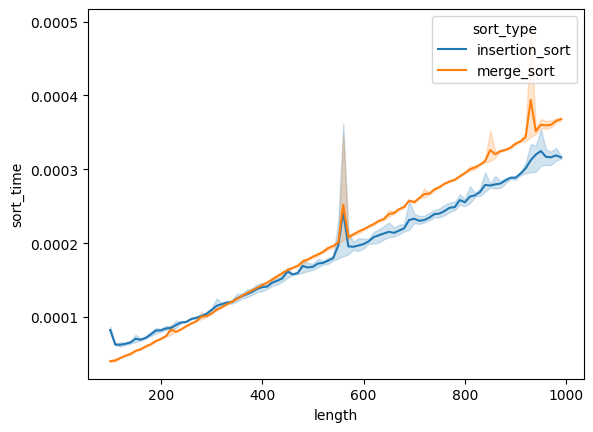

In [19]:
import seaborn as sns

sns.lineplot(x="length", y="sort_time", hue="sort_type", data=filtered)

/var/folders/3b/h5pkwjcn3lv68t_r_r1x1dm00000gn/T/ipykernel_3716/4118848761.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


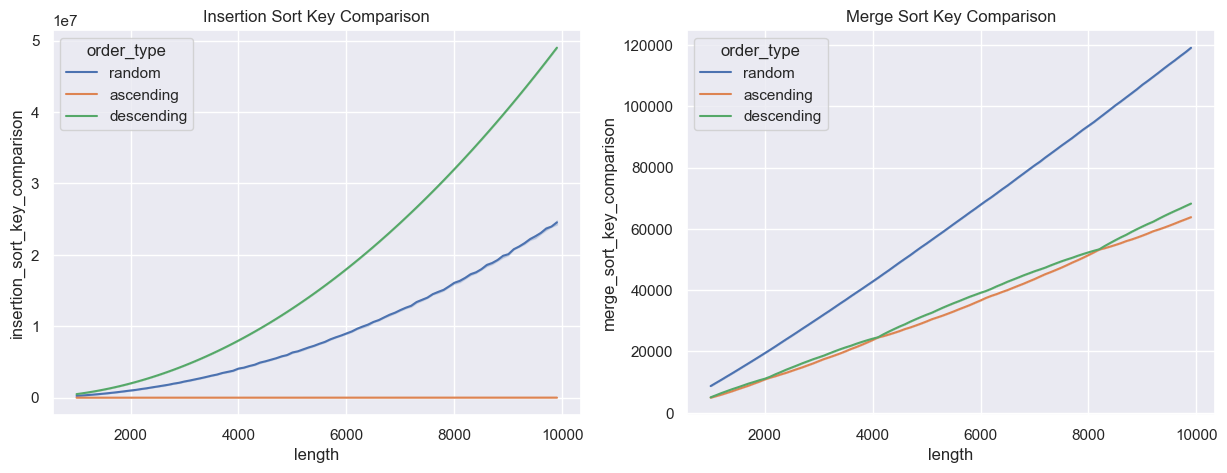

In [31]:
# overlay the insertion sort and merge sort key comparison graphs, on a single plot

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(ax=axs[0], x="length", y="insertion_sort_key_comparison", hue="order_type", data=insertion_sort)
axs[0].set_title("Insertion Sort Key Comparison")

sns.lineplot(ax=axs[1], x="length", y="merge_sort_key_comparison", hue="order_type", data=merge_sort)
axs[1].set_title("Merge Sort Key Comparison")

fig.show()